# Data Frames
How to do basic manipulation with Data Frames? How to run "queries" of their columns?


Let's import the `readr` package to use its fast `read_csv` function

In [2]:
# install.packages("readr")
library("readr")

Now let's pick a `data.frame` to work with. I got this one 👇 from [Kaggle](https://www.kaggle.com/datasets/claymaker/us-largest-companies). It's very interesting and mixes data of different modes (or types).

In [3]:
us_largest_incomes <- read_csv("webscrape.csv")
head(us_largest_incomes)

Rows: 100 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Name, Industry, Revenue growth, Headquarters
dbl (1): Rank
num (2): Revenue (USD millions), Employees

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>
1,Walmart,Retail,611289,6.7%,2100000,"Bentonville, Arkansas"
2,Amazon,Retail and Cloud Computing,513983,9.4%,1540000,"Seattle, Washington"
3,Exxon Mobil,Petroleum industry,413680,44.8%,62000,"Spring, Texas"
4,Apple,Electronics industry,394328,7.8%,164000,"Cupertino, California"
5,UnitedHealth Group,Healthcare,324162,12.7%,400000,"Minnetonka, Minnesota"
6,CVS Health,Healthcare,322467,10.4%,259500,"Woonsocket, Rhode Island"


In [29]:
length(us_largest_incomes$Rank)

[1] 100

In [32]:
class(us_largest_incomes$Rank)
class(us_largest_incomes$Name)
class(us_largest_incomes$"Revenue (USD millions)")

[1] "numeric"

[1] "character"

[1] "numeric"

In [41]:
mean(us_largest_incomes$"Revenue (USD millions)")
median(us_largest_incomes$"Revenue (USD millions)")
quantile(us_largest_incomes$"Revenue (USD millions)", prob = c(.25, .5, .75, .95, .99))


[1] 117566.5

[1] 80824.5

25%      50%      75%      95%      99% 
 57876.0  80824.5 138763.0 322551.8 514956.1

How many of them are in California?

In [63]:
california_largest_incomes <- us_largest_incomes[grep("California", us_largest_incomes$Headquarters, fixed = TRUE), ]

length(california_largest_incomes$Rank)
mean(california_largest_incomes$"Revenue (USD millions)")
quantile(california_largest_incomes$"Revenue (USD millions)", prob = c(.25, .5, .75, .95, .99))
head(california_largest_incomes)

[1] 10

[1] 142740

25%       50%       75%       95%       99% 
 63000.75  82790.50 213841.25 344156.60 384293.72

Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>
4,Apple,Electronics industry,394328,7.8%,164000,"Cupertino, California"
8,Alphabet,Technology,282836,9.8%,156000,"Mountain View, California"
10,Chevron Corporation,Petroleum industry,246252,51.6%,43846,"San Ramon, California"
31,Meta Platforms,Technology,116609,1.1%,86482,"Menlo Park, California"
47,Wells Fargo,Financials,82859,0.5%,238000,"San Francisco, California"
48,The Walt Disney Company,Media,82722,22.7%,195800,"Burbank, California"


How many of them are in Tech?

In [81]:
tech_in_ca <- california_largest_incomes[grep("Technology", california_largest_incomes$Industry, fixed = TRUE), ]

num_of_ca_companies <- length(california_largest_incomes$Rank)
num_of_ca_tech_companies <- length(tech_in_ca$Rank)
sprintf("Tech companies make up %s%% of the largest companies of California (or %d in %d)",
    (num_of_ca_tech_companies / num_of_ca_companies) * 100,
    num_of_ca_tech_companies,
    num_of_ca_companies)
mean(tech_in_ca$"Revenue (USD millions)")
quantile(tech_in_ca$"Revenue (USD millions)", prob = c(.25, .5, .75, .95, .99))
head(tech_in_ca)

[1] "Tech companies make up 50% of the largest companies of California (or 5 in 10)"

[1] 113936.4

25%      50%      75%      95%      99% 
 62983.0  63054.0 116609.0 249590.6 276186.9

Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>
8,Alphabet,Technology,282836,9.8%,156000,"Mountain View, California"
31,Meta Platforms,Technology,116609,1.1%,86482,"Menlo Park, California"
64,Intel,Technology,63054,20.1%,131900,"Santa Clara, California"
65,HP,Technology,62983,0.8%,58000,"Palo Alto, California"
100,Qualcomm,Technology,44200,31.7%,51000,"San Diego, California"


## Binning and frequencies
A useful way to understand distribuition is to group, or _bin_, certain continous values into discrete levels.

In [14]:
industry_factors <- factor(us_largest_incomes$Industry)

largest_revenues <- us_largest_incomes$"Revenue (USD millions)"
revenue_factors <- factor(cut(us_largest_incomes$"Revenue (USD millions)", breaks = (40000 + 50000 * (0:10))))

In [22]:
table(revenue_factors, industry_factors)

                   industry_factors
revenue_factors     Aerospace and defense Aerospace and Defense
  (4e+04,9e+04]                         1                     1
  (9e+04,1.4e+05]                       0                     0
  (1.4e+05,1.9e+05]                     0                     0
  (1.9e+05,2.4e+05]                     0                     0
  (2.4e+05,2.9e+05]                     0                     0
  (2.9e+05,3.4e+05]                     0                     0
  (3.9e+05,4.4e+05]                     0                     0
  (4.9e+05,5.4e+05]                     0                     0
                   industry_factors
revenue_factors     Agriculture cooperative Agriculture manufacturing Airline
  (4e+04,9e+04]                           1                         1       3
  (9e+04,1.4e+05]                         0                         0       0
  (1.4e+05,1.9e+05]                       0                         0       0
  (1.9e+05,2.4e+05]                     

A simpler way though would be to use the `hist` function.

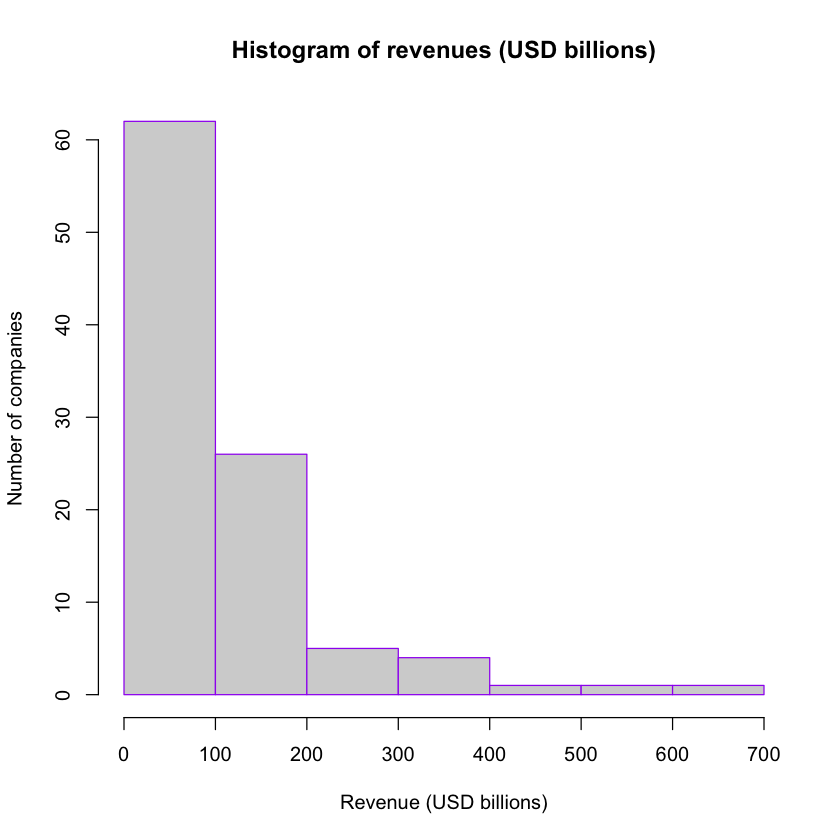

In [34]:
hist(largest_revenues / 1000, 
    main = "Histogram of revenues (USD billions)",
    xlab = "Revenue (USD billions)", 
    ylab = "Number of companies",
    border = "purple")

In [26]:
?hist

hist                 package:graphics                  R Documentation

_H_i_s_t_o_g_r_a_m_s

_D_e_s_c_r_i_p_t_i_o_n:

     The generic function ‘hist’ computes a histogram of the given data
     values.  If ‘plot = TRUE’, the resulting object of class
     ‘"histogram"’ is plotted by ‘plot.histogram’, before it is
     returned.

_U_s_a_g_e:

     hist(x, ...)
     
     ## Default S3 method:
     hist(x, breaks = "Sturges",
          freq = NULL, probability = !freq,
          include.lowest = TRUE, right = TRUE, fuzz = 1e-7,
          density = NULL, angle = 45, col = "lightgray", border = NULL,
          main = paste("Histogram of" , xname),
          xlim = range(breaks), ylim = NULL,
          xlab = xname, ylab,
          axes = TRUE, plot = TRUE, labels = FALSE,
          nclass = NULL, warn.unused = TRUE, ...)
     
_A_r_g_u_m_e_n_t_s:

       x: a vector of values for which the histogram is desired.

  breaks: one of:

            • a vector